<a href="https://colab.research.google.com/github/PreranaKolambkar/NLP-Spam-Classification-using-Navie-Bayes/blob/main/SPAM_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
!pip install spacy

In [63]:
!pip install wordcloud

In [64]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [65]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 80.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df= pd.read_csv('/content/SMSSpamCollection',sep='\t',header=None,names=['label','msg'])

In [68]:
df.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [69]:
df['len']=df['msg'].apply(len)

In [70]:
# ham and spam has mssgs

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

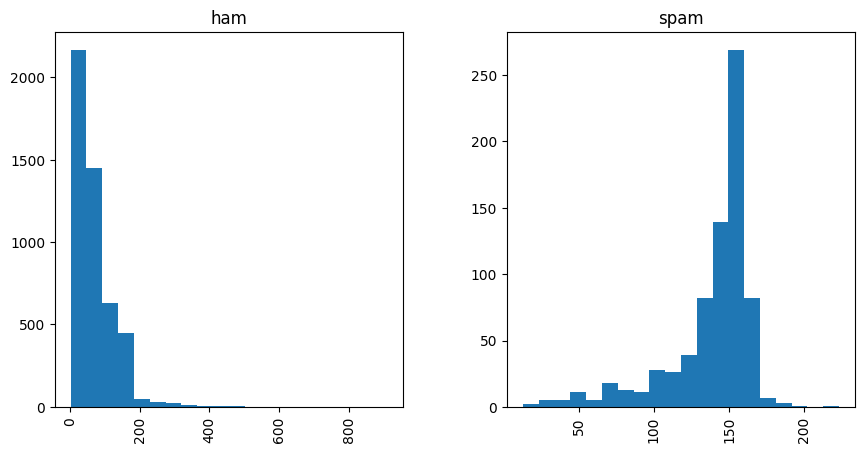

In [71]:
df.hist('len',by='label',bins=20,figsize=(10,5)) # count of message

In [72]:
# spam has more lengthy mssge bcoz x axis length keeps  on increasing


In [73]:
df['len'].describe()

,len
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [74]:
df[df['len']==910] # maximum mssg

,label,msg,len
1085,ham,For me the love should start with attraction.i...,910


In [75]:
df[df['len']==910].iloc[0,1]  # to reag the message

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [76]:
df[df['len']==10].iloc[0,1]

'Can a not?'

In [77]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [78]:
from nltk.corpus import stopwords
stopwords.words('english')  # check for stop words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [79]:
from nltk.stem import PorterStemmer  #stemming

In [80]:
from nltk.stem import WordNetLemmatizer  # root word

In [81]:
lem=WordNetLemmatizer()

In [82]:
## tokenization

In [83]:
from nltk.tokenize import word_tokenize,sent_tokenize

**mssg sent by ham or spam?**

**1. Data cleaning**

In [84]:
import re  # regular expression

In [85]:
def clean_words(text):
  text1=' '.join(re.findall('\w+',text))
  doc=nlp(text1)   # nlp has all spacy package
  clean_text=[token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_bracket and not token.is_digit and not token.is_currency and not token.is_space]
  return clean_text
  # first check token in doc for stopword,punctaution,bracket then apply lemmitization

In [86]:
count

CountVectorizer(analyzer=<function clean_words at 0x7ec258fb4cc0>)

In [87]:
x=count.fit_transform(df['msg'])

In [88]:
a=tfidf.fit_transform(x)

In [89]:
a.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [90]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [91]:
multi=MultinomialNB()

In [92]:
multi.fit(a,df['label'])  # xtrain=a,ytrain=label only training validation

MultinomialNB()

In [93]:
y_pred=multi.predict(a)

In [94]:
y_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [95]:
accuracy_score(df['label'],y_pred)

0.9800789662598708

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x_train,x_test,y_train,y_test=train_test_split(df['msg'],df['label'],train_size=0.75,random_state=100)

In [98]:
x_train.shape

(4179,)

In [99]:
x_test.shape

(1393,)

In [100]:
y_train.shape

(4179,)

In [101]:
# pipleine all 4 steps included cleaning,vector,tfidf,algorithm

In [102]:
from sklearn.pipeline import Pipeline

In [103]:
pipeline=Pipeline([('count',CountVectorizer(analyzer=clean_words)),('tfidf',TfidfTransformer()),('multi',MultinomialNB())])

In [104]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('count',
                 CountVectorizer(analyzer=<function clean_words at 0x7ec240c6c680>)),
                ('tfidf', TfidfTransformer()), ('multi', MultinomialNB())])

In [105]:
y_pred=pipeline.predict(x_test)

In [106]:
accuracy_score(y_test,y_pred)

0.9676956209619526